# Initial Analysis of Kaggle's Titanic Data Set

In [1]:
#Import required packages
import pandas as pd
from pandas import Series,DataFrame

#Read in file
titanic_df = pd.read_csv('train.csv')

titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [2]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


Questions we will want to address
1. What are the demographics of the passengers?
    -Age
    -Sex
    -Class
2. What factors influenced the survivability of each passenger?


We start with a quick visualisation and analysis using Seaborn and Matplotlib

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/Users/robinphetsavong/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


We'll use a factor plot to see the ratio between male and females of passengers in the training set

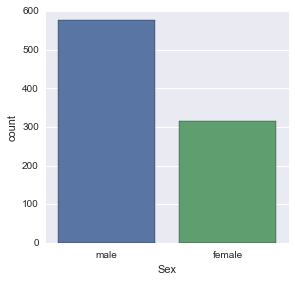

In [4]:
sns.factorplot('Sex', data=titanic_df, kind="count")

We can see that the ratio between male and female is about 2:1

Now we'll plot Pclass categorized by gender

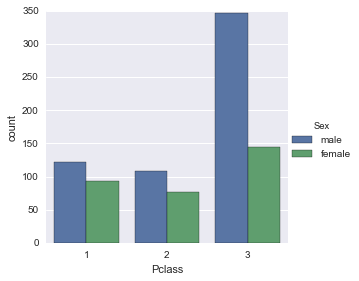

In [5]:
sns.factorplot('Pclass', data=titanic_df, kind='count', hue='Sex')

We see here that the ratio between male and female is extremely high in 3rd class.

Now we'll make a function to parse through the data to determine if anyone is less than the age of 16, if so mark them as a child in a new column that we'll call "Person"

In [12]:

def male_female_child(passenger):
    # Take the parameters Age and Sex
    age,sex = passenger
    # Compare the age, otherwise leave the sex
    if age < 16:
        return 'child'
    else:
        return sex
    
titanic_df['person'] = titanic_df[['Age','Sex']].apply(male_female_child,axis=1)

In [14]:
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NaN,C,child


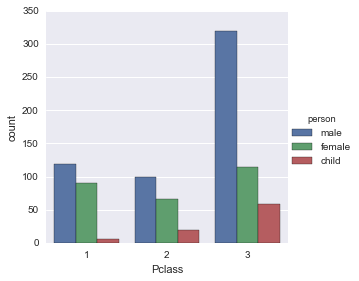

In [15]:
sns.factorplot('Pclass',data=titanic_df,hue='person',kind='count')

It looks like the majority of men were in third class

Let's use a FacetGrid to plot a Kernel Density Estimator plot on age

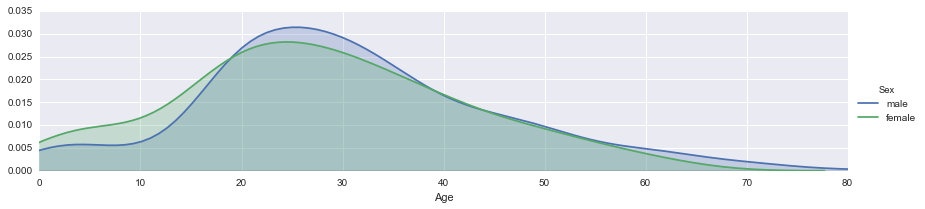

In [16]:
fig = sns.FacetGrid(titanic_df, hue="Sex",aspect=4)

fig.map(sns.kdeplot,'Age',shade= True)

oldest = titanic_df['Age'].max()

fig.set(xlim=(0,oldest))

fig.add_legend()

Now lets look at the KDE plot for Person

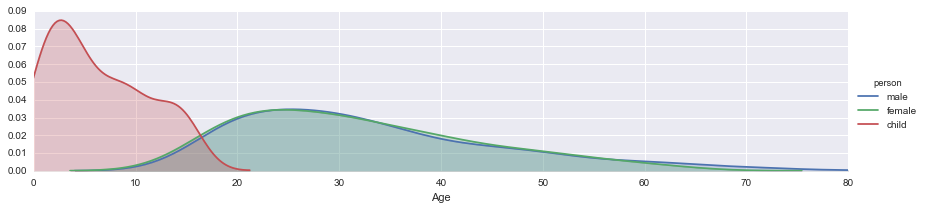

In [17]:

fig = sns.FacetGrid(titanic_df, hue="person",aspect=4)
fig.map(sns.kdeplot,'Age',shade= True)
oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

In [ ]:
Now Class

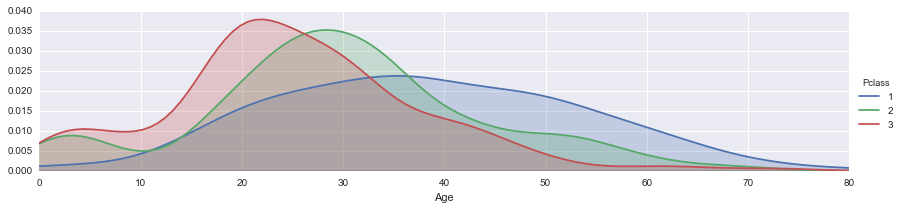

In [18]:
fig = sns.FacetGrid(titanic_df, hue="Pclass",aspect=4)
fig.map(sns.kdeplot,'Age',shade= True)
oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

So we learned that the ratio between male and females is greatest in third class
and that most children were in third class as well. We also know that the Titanic had
a women and children first policy when it came to prioritizing lifeboat occupants. Most likely
it would have been based on class after. So we can predict that the majority of men in 3rd class 
did not survive. We'll do some further analysis.

Lets see the counts for those who surived vs those who didn't'

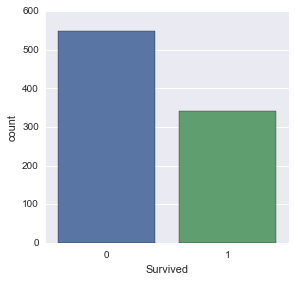

In [20]:
sns.factorplot('Survived', data=titanic_df, kind='count')

There's significantly more' passengers in our training data that did not survive than those that did.
However since this is a subset of our entire data we cannot say for certainty this is the case as our test set 
does not have the survived status of the passengers.

Lets see if class makes a difference

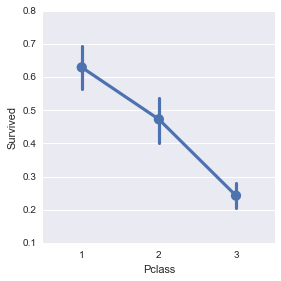

In [25]:
sns.factorplot('Pclass','Survived', data=titanic_df)

Our intuition was correct, third class has significantly lower survival rates. But does that extend
to women and children also?

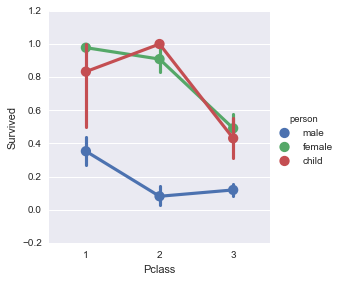

In [27]:
sns.factorplot('Pclass','Survived', data=titanic_df, hue='person')

Again we were correct in that women and children had a higher survivability rate than men,
this is true for all classes.

Lets see if age has a significant effect

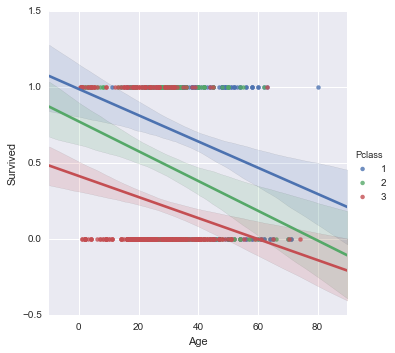

In [28]:

sns.lmplot('Age','Survived',hue='Person',data=titanic_df)

In [ ]:
As passenger age increases, their survival probability decreases, this falls along our
assumption that children were prioritized

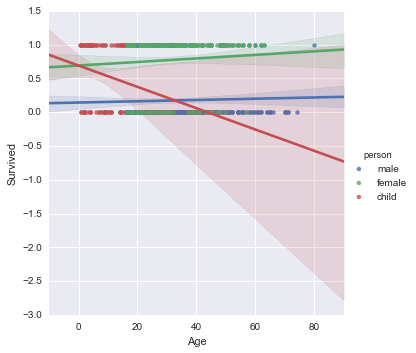

In [30]:
sns.lmplot('Age','Survived',hue='person',data=titanic_df)

In [ ]:
Here we see that younger children were more likely to survive, it appears that age makes
little difference for men and women however.

In [36]:
np.mean(titanic_df['Age'])

29.69911764705882